In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import identify_nominal_columns, associations
import numpy as np

sns.set_style("whitegrid")
sns.set_theme(rc={'figure.figsize':(12, 6)})

In [2]:
dados = pd.read_csv("C:/Users/Pichau/projects/Machine Learning/TechChallenge#1/insurance_dataset.csv")

# Análise Exploratória

## Overview dos Dados

In [3]:
dados.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
dados.shape

(1000000, 12)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [6]:
dados.isna().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [7]:
set(dados['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [8]:
set(dados['family_medical_history'])

{'Diabetes', 'Heart disease', 'High blood pressure', nan}

In [9]:
set(dados['medical_history'])

{'Diabetes', 'Heart disease', 'High blood pressure', nan}

In [10]:
set(dados['coverage_level'])

{'Basic', 'Premium', 'Standard'}

In [11]:
set(dados['exercise_frequency'])

{'Frequently', 'Never', 'Occasionally', 'Rarely'}

In [12]:
set(dados['occupation'])

{'Blue collar', 'Student', 'Unemployed', 'White collar'}

## Análise Gráfica

Por conta do tamanho da base de dados vamos usar o KMeans para criar clusters e depois tirar samples de cada cluster.

Para rodar o KMeans temos que tratar os dados categóricos e nulos.

Transformação das variáveis categóricas

In [13]:
categorical_cols = identify_nominal_columns(dados)
dados_dummy = pd.get_dummies(dados, columns=categorical_cols, dtype=int)

Variáveis categóricas transformadas

In [14]:
dados_dummy.head()

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,25,25.38,2,20390.899218,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,38,44.88,2,20204.476302,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,25,19.89,0,11789.029843,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,49,38.21,3,19268.309838,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


In [15]:
dados_dummy.isnull().sum()

age                                           0
bmi                                           0
children                                      0
charges                                       0
gender_female                                 0
gender_male                                   0
smoker_no                                     0
smoker_yes                                    0
region_northeast                              0
region_northwest                              0
region_southeast                              0
region_southwest                              0
medical_history_Diabetes                      0
medical_history_Heart disease                 0
medical_history_High blood pressure           0
family_medical_history_Diabetes               0
family_medical_history_Heart disease          0
family_medical_history_High blood pressure    0
exercise_frequency_Frequently                 0
exercise_frequency_Never                      0
exercise_frequency_Occasionally         

Com as variáveis categóricas criadas e os valores nulos retirados podemos rodar o KMeans.

Mas antes vamos pegar a matriz de correlação dos dados, para tirar a prova real depois da criação dos clusters.

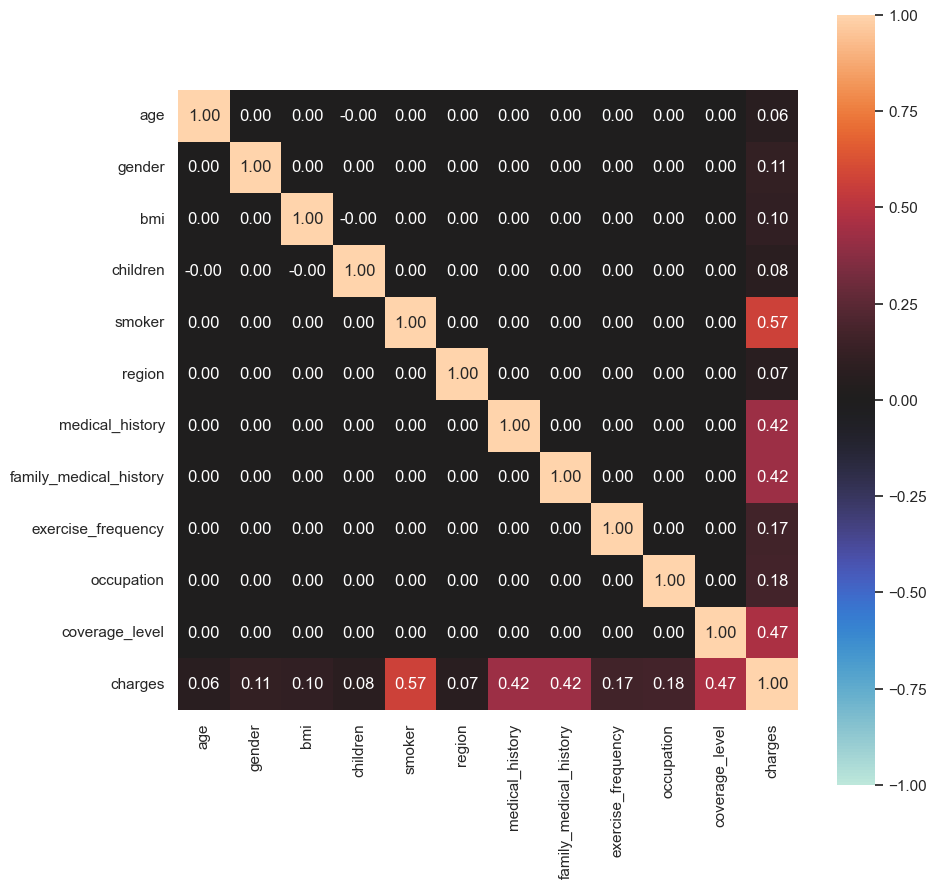

In [16]:
corr = associations(dados, figsize=(10,10))

Treinamento do KMeans e criação dos clusters

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)

kmeans.fit(dados_dummy)

cluster_labels = kmeans.labels_

Cluster distribution:
cluster
0    114344
1    101325
2    144896
3     68928
4     45567
5    140911
6    140017
7     26719
8     85439
9    131854
Name: count, dtype: int64

Cluster statistics:
              charges                                         
                 mean          std           min           max
cluster                                                       
0        12649.692837   547.711769  11630.740380  13537.147972
1        21552.225202   609.038956  20584.716289  22709.672016
2        16123.882893   493.891008  15274.139491  16986.056760
3        23871.384435   750.842365  22709.685769  25387.653222
4         8199.988719   949.000316   3445.011643   9406.647487
5        17854.159580   504.936277  16986.069391  18735.280550
6        14430.450094   498.713302  13537.146322  15274.136743
7        26907.926751  1289.157508  25387.695620  32561.560374
8        10616.832599   635.709880   9406.726649  11630.729488
9        19621.548908   529.570212  18735.29823

C:\Users\Pichau\AppData\Local\Temp\ipykernel_26660\1228746764.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster')


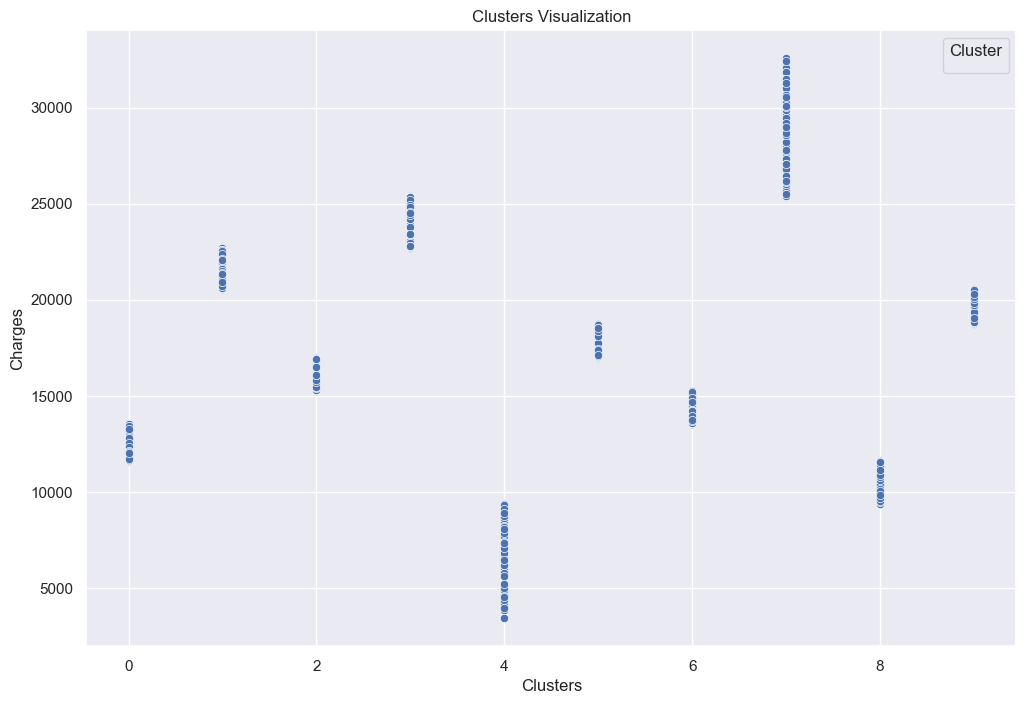

In [18]:
dados_dummy['cluster'] = cluster_labels

cluster_distribution = dados_dummy['cluster'].value_counts().sort_index()
print("Cluster distribution:")
print(cluster_distribution)

cluster_stats = dados_dummy.groupby('cluster').agg({
    'charges': ['mean', 'std', 'min', 'max'],
})
print("\nCluster statistics:")
print(cluster_stats)

# Visualização dos clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=dados_dummy,
    x='cluster',
    y='charges',
)
plt.title('Clusters Visualization')
plt.xlabel('Clusters')
plt.ylabel('Charges')
plt.legend(title='Cluster')
plt.show()


Criação do dataset de samples

In [19]:
sampled_data = pd.DataFrame()
for cluster_id in range(kmeans.n_clusters):
    cluster_data = dados[cluster_labels == cluster_id]
    # sample de 1% de cada cluster
    sample_size = int(0.01 * len(cluster_data))
    cluster_sample = cluster_data.sample(n=sample_size, random_state=42)
    sampled_data = pd.concat([sampled_data, cluster_sample])

sampled_data.reset_index(drop=True, inplace=True)
sampled_data

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,42,male,20.80,2,no,southwest,Diabetes,High blood pressure,Frequently,Unemployed,Standard,12619.272980
1,54,female,41.10,0,no,northeast,Heart disease,NaN,Never,Unemployed,Standard,12943.048698
2,41,male,40.70,2,no,southeast,NaN,High blood pressure,Rarely,Blue collar,Standard,12193.736310
3,60,male,25.93,4,yes,southeast,NaN,High blood pressure,Never,Unemployed,Basic,12473.601881
4,47,female,31.55,2,no,southwest,NaN,Heart disease,Never,Unemployed,Standard,12466.618677
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,60,male,30.76,4,yes,northwest,High blood pressure,NaN,Never,Blue collar,Premium,19486.772623
9992,31,male,42.19,0,yes,northwest,NaN,Diabetes,Frequently,Unemployed,Premium,20411.831558
9993,22,male,35.95,0,yes,northwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,18845.884346
9994,39,female,46.82,1,yes,northeast,High blood pressure,Diabetes,Frequently,White collar,Standard,20148.665770


Prova real de que os samples representam igualmente a base original.

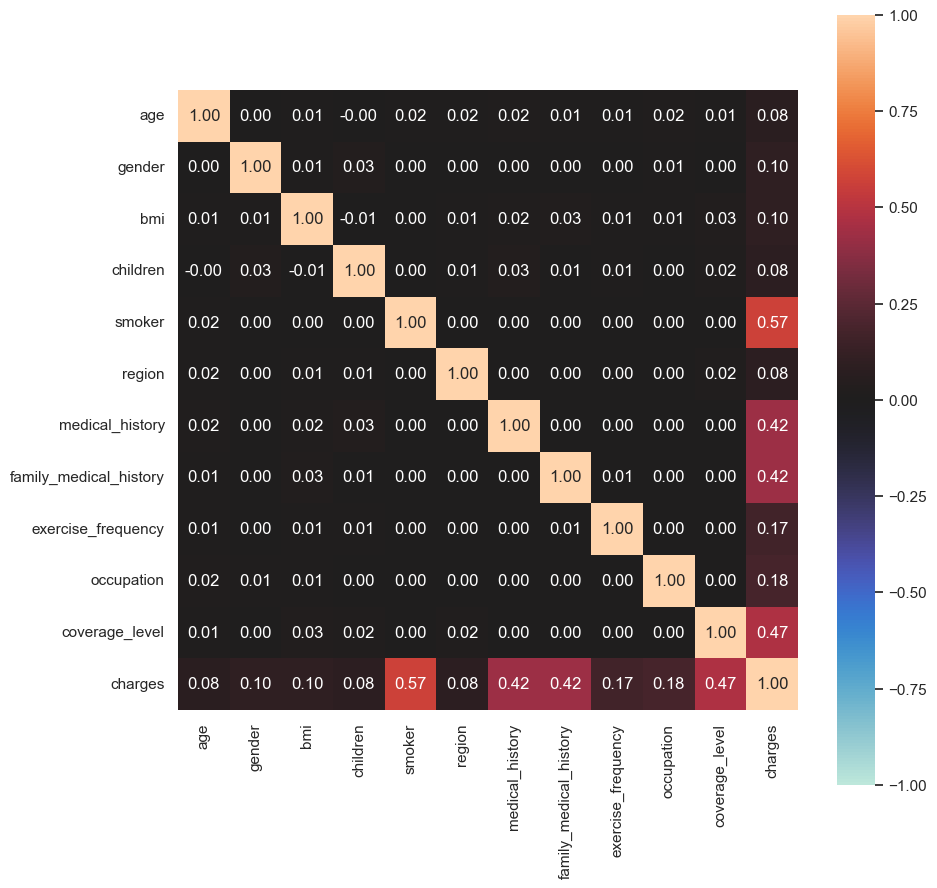

In [20]:
corr = associations(sampled_data, figsize=(10,10))

### Pergunta 1

Baseado na matriz de correlação smoker é a variável mais representativa dos dados.

Podemos plotar um gráfico para validar se ela tem alguma relação com o aumento do charges.

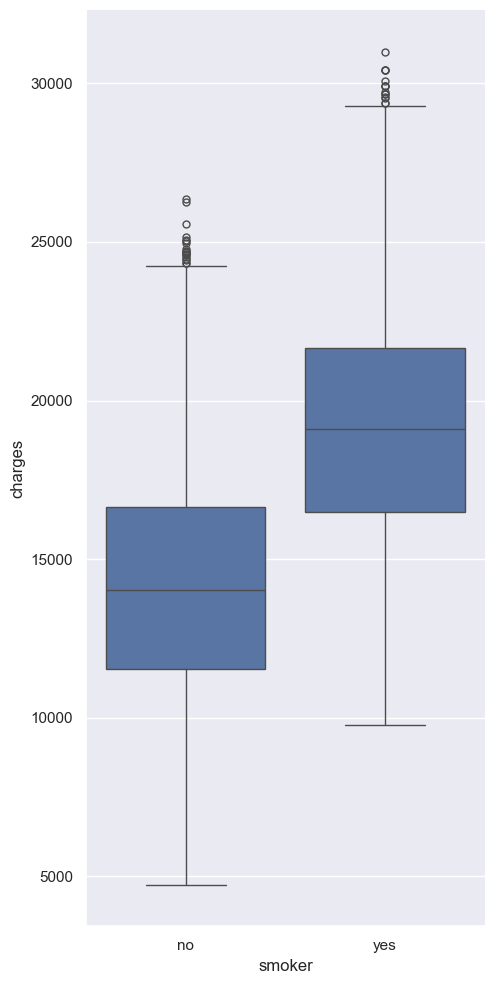

In [21]:
sns.catplot(data=sampled_data, x="smoker", y="charges", height=10, aspect=.5, kind="box")

Resposta: Sim, parece que os fumantes em média tem charges maiores.

### Pergunta 2

Será o que o charges acompanha o nivel de cobertura do usuário?

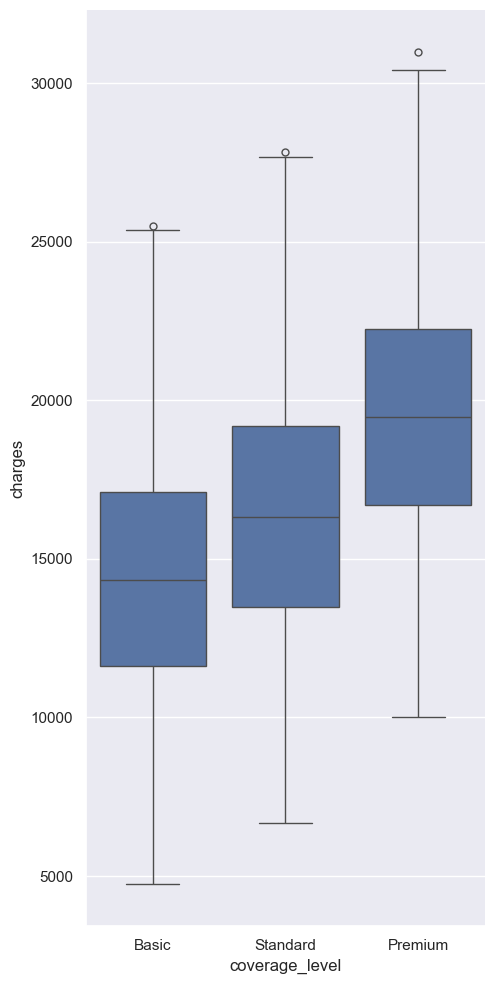

In [22]:
sns.catplot(data=sampled_data, x="coverage_level", y="charges", height=10, aspect=.5, kind="box", order=["Basic", "Standard", "Premium"])

Resposta: Parece que o charges acompanha o "nível" de cobertura do plano do usuário.

### Pergunta 3

Qual doença do histórico pessoal e familiar tem mais impacto no valor do charges?

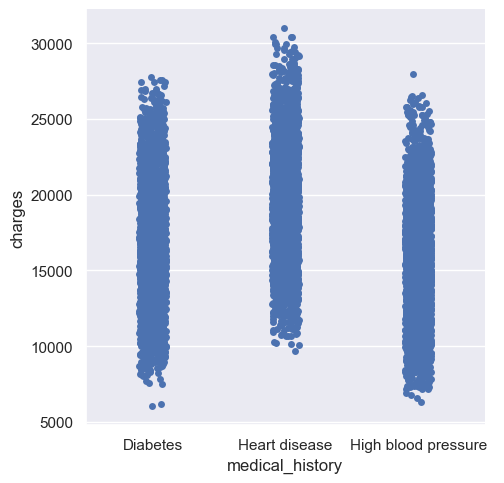

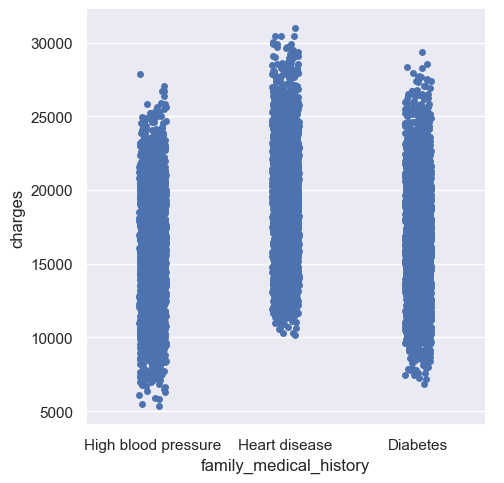

In [23]:
sns.catplot(data=sampled_data, x="medical_history", y="charges")
sns.catplot(data=sampled_data, x="family_medical_history", y="charges")

Resposta: as doenças que tem mais impacto em ambos os casos, em ordem, são:

1. Heart Disease
2. Diabetes
3. High blood pressure

### Pergunta 4

Qual valor em média que os fumantes pagam a mais do que os não fumantes no plano de saúde?

In [24]:
media_fumantes = sampled_data.loc[sampled_data['smoker'] == "yes"]['charges'].mean()
media_nao_fumantes = sampled_data.loc[sampled_data['smoker'] == "no"]['charges'].mean()
diferenca = media_fumantes - media_nao_fumantes

print(f"Diferença: {diferenca}")

Diferença: 5013.7797989332375


Resposta: Em média fumantes pagam $5034.88 a mais do que não fumantes.

# Transformação das amostras

In [25]:
categorical_cols = identify_nominal_columns(sampled_data)
sampled_dummy_data = pd.get_dummies(sampled_data, columns=categorical_cols, dtype=int)

# Treinamento dos modelos

## Separar dados de treino e teste

In [26]:
from sklearn.model_selection import train_test_split

X = sampled_dummy_data.drop(columns=['charges'])
y = sampled_dummy_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original: {sampled_dummy_data.shape}")
print(f"Training: {X_train.shape}, {y_train.shape}")
print(f"Testing: {X_test.shape}, {y_test.shape}")

Original: (9996, 29)
Training: (7996, 28), (7996,)
Testing: (2000, 28), (2000,)


## Treinamento e teste dos modelos

In [27]:
# DataFrame de resultados
results_df = pd.DataFrame({ "Model": [], "RMSE": [], "R2": []})

def add_result(model, rmse, r2):
    results_df.loc[len(results_df)] = { "Model": model, "RMSE": rmse, "R2": r2 }

In [28]:
from sklearn.metrics import root_mean_squared_error, r2_score

##### Ridge

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_model = Ridge()

ridge_grid = GridSearchCV(ridge_model, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_root_mean_squared_error', refit=True)
ridge_grid.fit(X_train, y_train)


c:\Users\Pichau\miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.0486e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Pichau\miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.80243e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Pichau\miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.89402e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Pichau\miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.83877e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overw

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_root_mean_squared_error')

In [30]:
y_pred = ridge_grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Ridge Regression Model Performance:")
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

add_result("RidgeRegression", rmse, r2)

Ridge Regression Model Performance:
R2: 0.9957572678622559
RMSE: 288.20988703751635


##### XGBRegressor

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=500
, random_state=42)

param_grid = {'max_depth': [3, 5, 7, 9],
              'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 1000]}

xgb_grid = GridSearchCV(xgb_model, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring="neg_root_mean_squared_error", refit=True)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          1000]},
             scoring='neg_root_mean_squared_error')

In [32]:
y_pred = xgb_grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("XGB Regression Model Performance")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

add_result("XGBRegressor", rmse, r2)

XGB Regression Model Performance
R² Score: 0.9949211721518542
RMSE: 315.3318323658731


# Demonstração dos resultados

In [33]:
results_df.head()

,Model,RMSE,R2
0,RidgeRegression,288.209887,0.995757
1,XGBRegressor,315.331832,0.994921


In [34]:
best_model = results_df.loc[results_df['RMSE'] == results_df['RMSE'].min()]
best_model

,Model,RMSE,R2
0,RidgeRegression,288.209887,0.995757


<Axes: ylabel='None'>

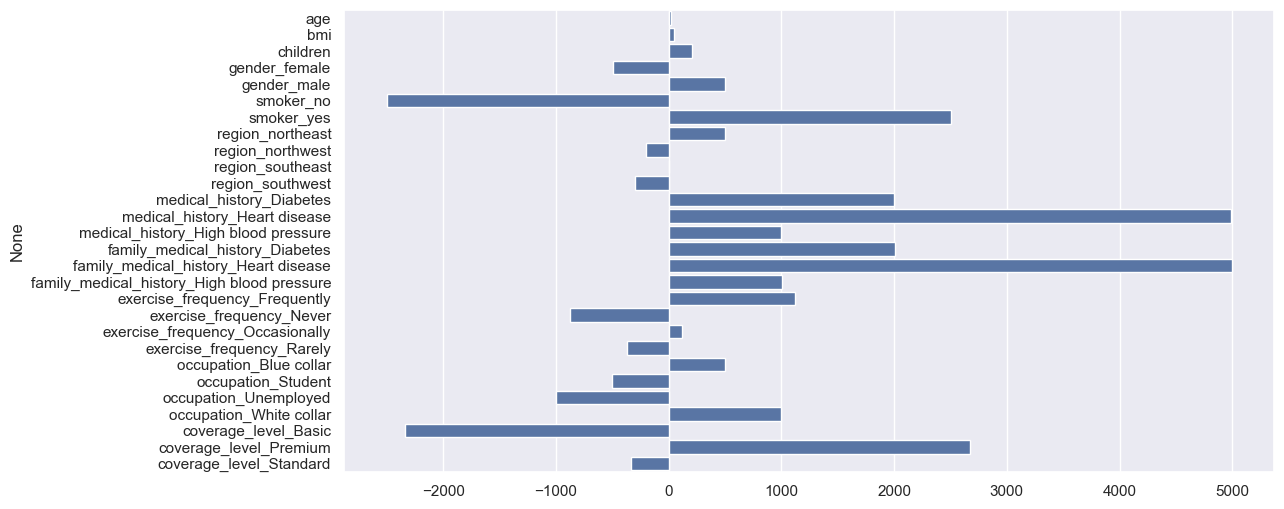

In [36]:
sns.barplot(x=ridge_grid.best_estimator_.coef_, y=X.columns)